In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [110]:
type(model)

sklearn.linear_model._base.LinearRegression

In [111]:
#Cargar archivo csv desde seaborn
df= pd.read_csv('Mexico_Private_Room.csv')
df.head(2)

,Unnamed: 0,listing_url,last_scraped,description,host_url,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded
0,5,https://www.airbnb.com/rooms/131610,2024-09-26,No contiene descripción,https://www.airbnb.com/users/show/647454,2011-05-31,within an hour,No contiene host_response_rate,No contiene host_acceptance_rate,f,...,4.76,4.84,4.83,4.85,3.0,1.0,2.0,0.0,1.74,2
1,7,https://www.airbnb.com/rooms/171109,2024-09-25,"Stay in a private room 2 blocks away from WTC,...",https://www.airbnb.com/users/show/816295,2011-07-13,within a few hours,100%,78%,t,...,4.86,4.98,4.95,4.97,2.0,0.0,2.0,0.0,0.84,2


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

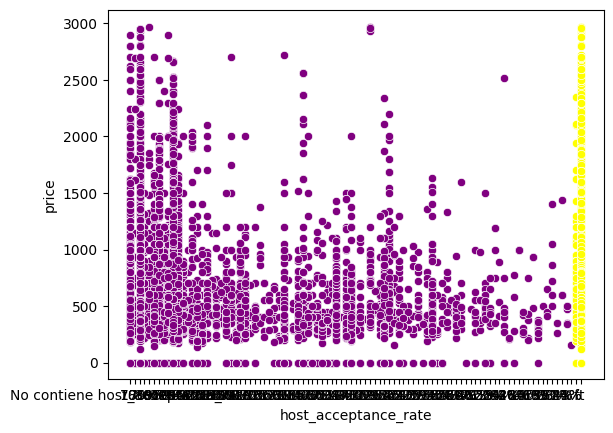

In [112]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "host_acceptance_rate"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_acceptance_rate',y='price',color='purple',data=df)
sns.scatterplot(x='host_identity_verified',y='price',color='yellow',data=df)

In [113]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_acceptance_rate']]
Var_Dep = df['price']

In [114]:
# Reemplazar valores faltantes y convertir a número
df["host_acceptance_rate"] = df["host_acceptance_rate"].astype(str)  # Convertir todo a string
df["host_acceptance_rate"] = df["host_acceptance_rate"].replace("No contiene host_acceptance_rate", "0%")
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.rstrip("%").astype(float) / 100  # Eliminar "%" y convertir a float

# Verificar que ahora sean valores numéricos
print(df["host_acceptance_rate"].dtype)  # Debe ser float

# Asegurar que las variables independientes sean numéricas
Vars_Indep = df[["host_acceptance_rate"]]  # Agregar otras variables aquí
Var_Dep = df["price"]  # Variable dependiente

# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

float64


LinearRegression()

In [115]:
#model.__dict__ se utiliza para ver los atributos del modelo
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([233.05105446]),
 'rank_': 1,
 'singular_': array([37.49676933]),
 'intercept_': np.float64(397.56914570538805)}

In [116]:
#Predecimos los valores del total de la variable independiente
y_predic = model.predict(X = df[['host_acceptance_rate']])
y_predic

array([397.56914571, 579.34896819, 630.62020017, ..., 630.62020017,
       630.62020017, 630.62020017], shape=(8693,))

In [117]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones', y_predic)
df

,Predicciones,Unnamed: 0,listing_url,last_scraped,description,host_url,host_since,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded
0,397.569146,5,https://www.airbnb.com/rooms/131610,2024-09-26,No contiene descripción,https://www.airbnb.com/users/show/647454,2011-05-31,within an hour,No contiene host_response_rate,0.00,...,4.76,4.84,4.83,4.85,3.00,1.0,2.00,0.0,1.74,2
1,579.348968,7,https://www.airbnb.com/rooms/171109,2024-09-25,"Stay in a private room 2 blocks away from WTC,...",https://www.airbnb.com/users/show/816295,2011-07-13,within a few hours,100%,0.78,...,4.86,4.98,4.95,4.97,2.00,0.0,2.00,0.0,0.84,2
2,630.620200,10,https://www.airbnb.com/rooms/1013504,2024-09-25,Private room (single bed) with private bathro...,https://www.airbnb.com/users/show/1664327,2012-01-28,within an hour,100%,1.00,...,4.92,4.92,4.94,4.92,2.00,0.0,2.00,0.0,0.54,2
3,397.569146,11,https://www.airbnb.com/rooms/1051636,2024-09-26,"Like home! Private room in charming, tasteful ...",https://www.airbnb.com/users/show/22366411,2014-10-10,within an hour,No contiene host_response_rate,0.00,...,4.97,4.97,4.77,4.93,1.00,0.0,1.00,0.0,0.22,2
4,572.357437,12,https://www.airbnb.com/rooms/1066945,2024-09-25,In front of the Frida Kahlo Museum.<br /> Priv...,https://www.airbnb.com/users/show/5870021,2013-04-10,within an hour,100%,0.75,...,4.97,4.96,4.91,4.97,5.00,0.0,5.00,0.0,1.15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,397.569146,26576,https://www.airbnb.com/rooms/1251897198681126075,2024-09-25,"This accommodation is very well located, if yo...",https://www.airbnb.com/users/show/546574784,2023-11-15,within an hour,No contiene host_response_rate,0.00,...,4.76,4.84,4.83,4.85,1.00,0.0,1.00,0.0,1.74,2
8689,630.620200,26577,https://www.airbnb.com/rooms/1252141718111439700,2024-09-25,Experience Mexico City in this delightful retr...,https://www.airbnb.com/users/show/67472234,2016-04-16,within an hour,100%,1.00,...,4.76,4.84,4.83,4.85,4.87,14.0,0.74,0.0,1.74,2
8690,630.620200,26578,https://www.airbnb.com/rooms/1252159821531694005,2024-09-25,This spacious room features a plush king-size ...,https://www.airbnb.com/users/show/596009321,2024-08-13,within an hour,100%,1.00,...,4.76,4.84,4.83,4.85,16.00,8.0,0.74,0.0,1.74,2
8691,630.620200,26579,https://www.airbnb.com/rooms/1252185591721328995,2024-09-25,Discover the essence of luxury in our king-siz...,https://www.airbnb.com/users/show/596009321,2024-08-13,within an hour,100%,1.00,...,4.76,4.84,4.83,4.85,16.00,8.0,0.74,0.0,1.74,2


In [118]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.0401176366050261

In [119]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.20029387560538664)

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

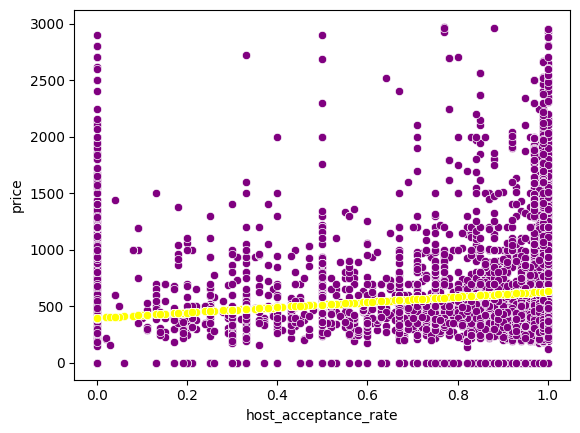

In [120]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate',y='price',color='purple',data = df)
sns.scatterplot(x='host_acceptance_rate',y='Predicciones',color='yellow',data = df)

In [121]:
#En esta linea de código se trandforman los valores de las variables categóricas a numéricas
df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 0})

C:\Users\cesar\AppData\Local\Temp\ipykernel_21928\827320779.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 0})


In [122]:
df['room_type'] = 1

In [123]:
df = df[['price', 'host_is_superhost', 'host_acceptance_rate', 'room_type', 
         'accommodates', 'bathrooms', 'review_scores_cleanliness', 
         'host_identity_verified', 'instant_bookable']]

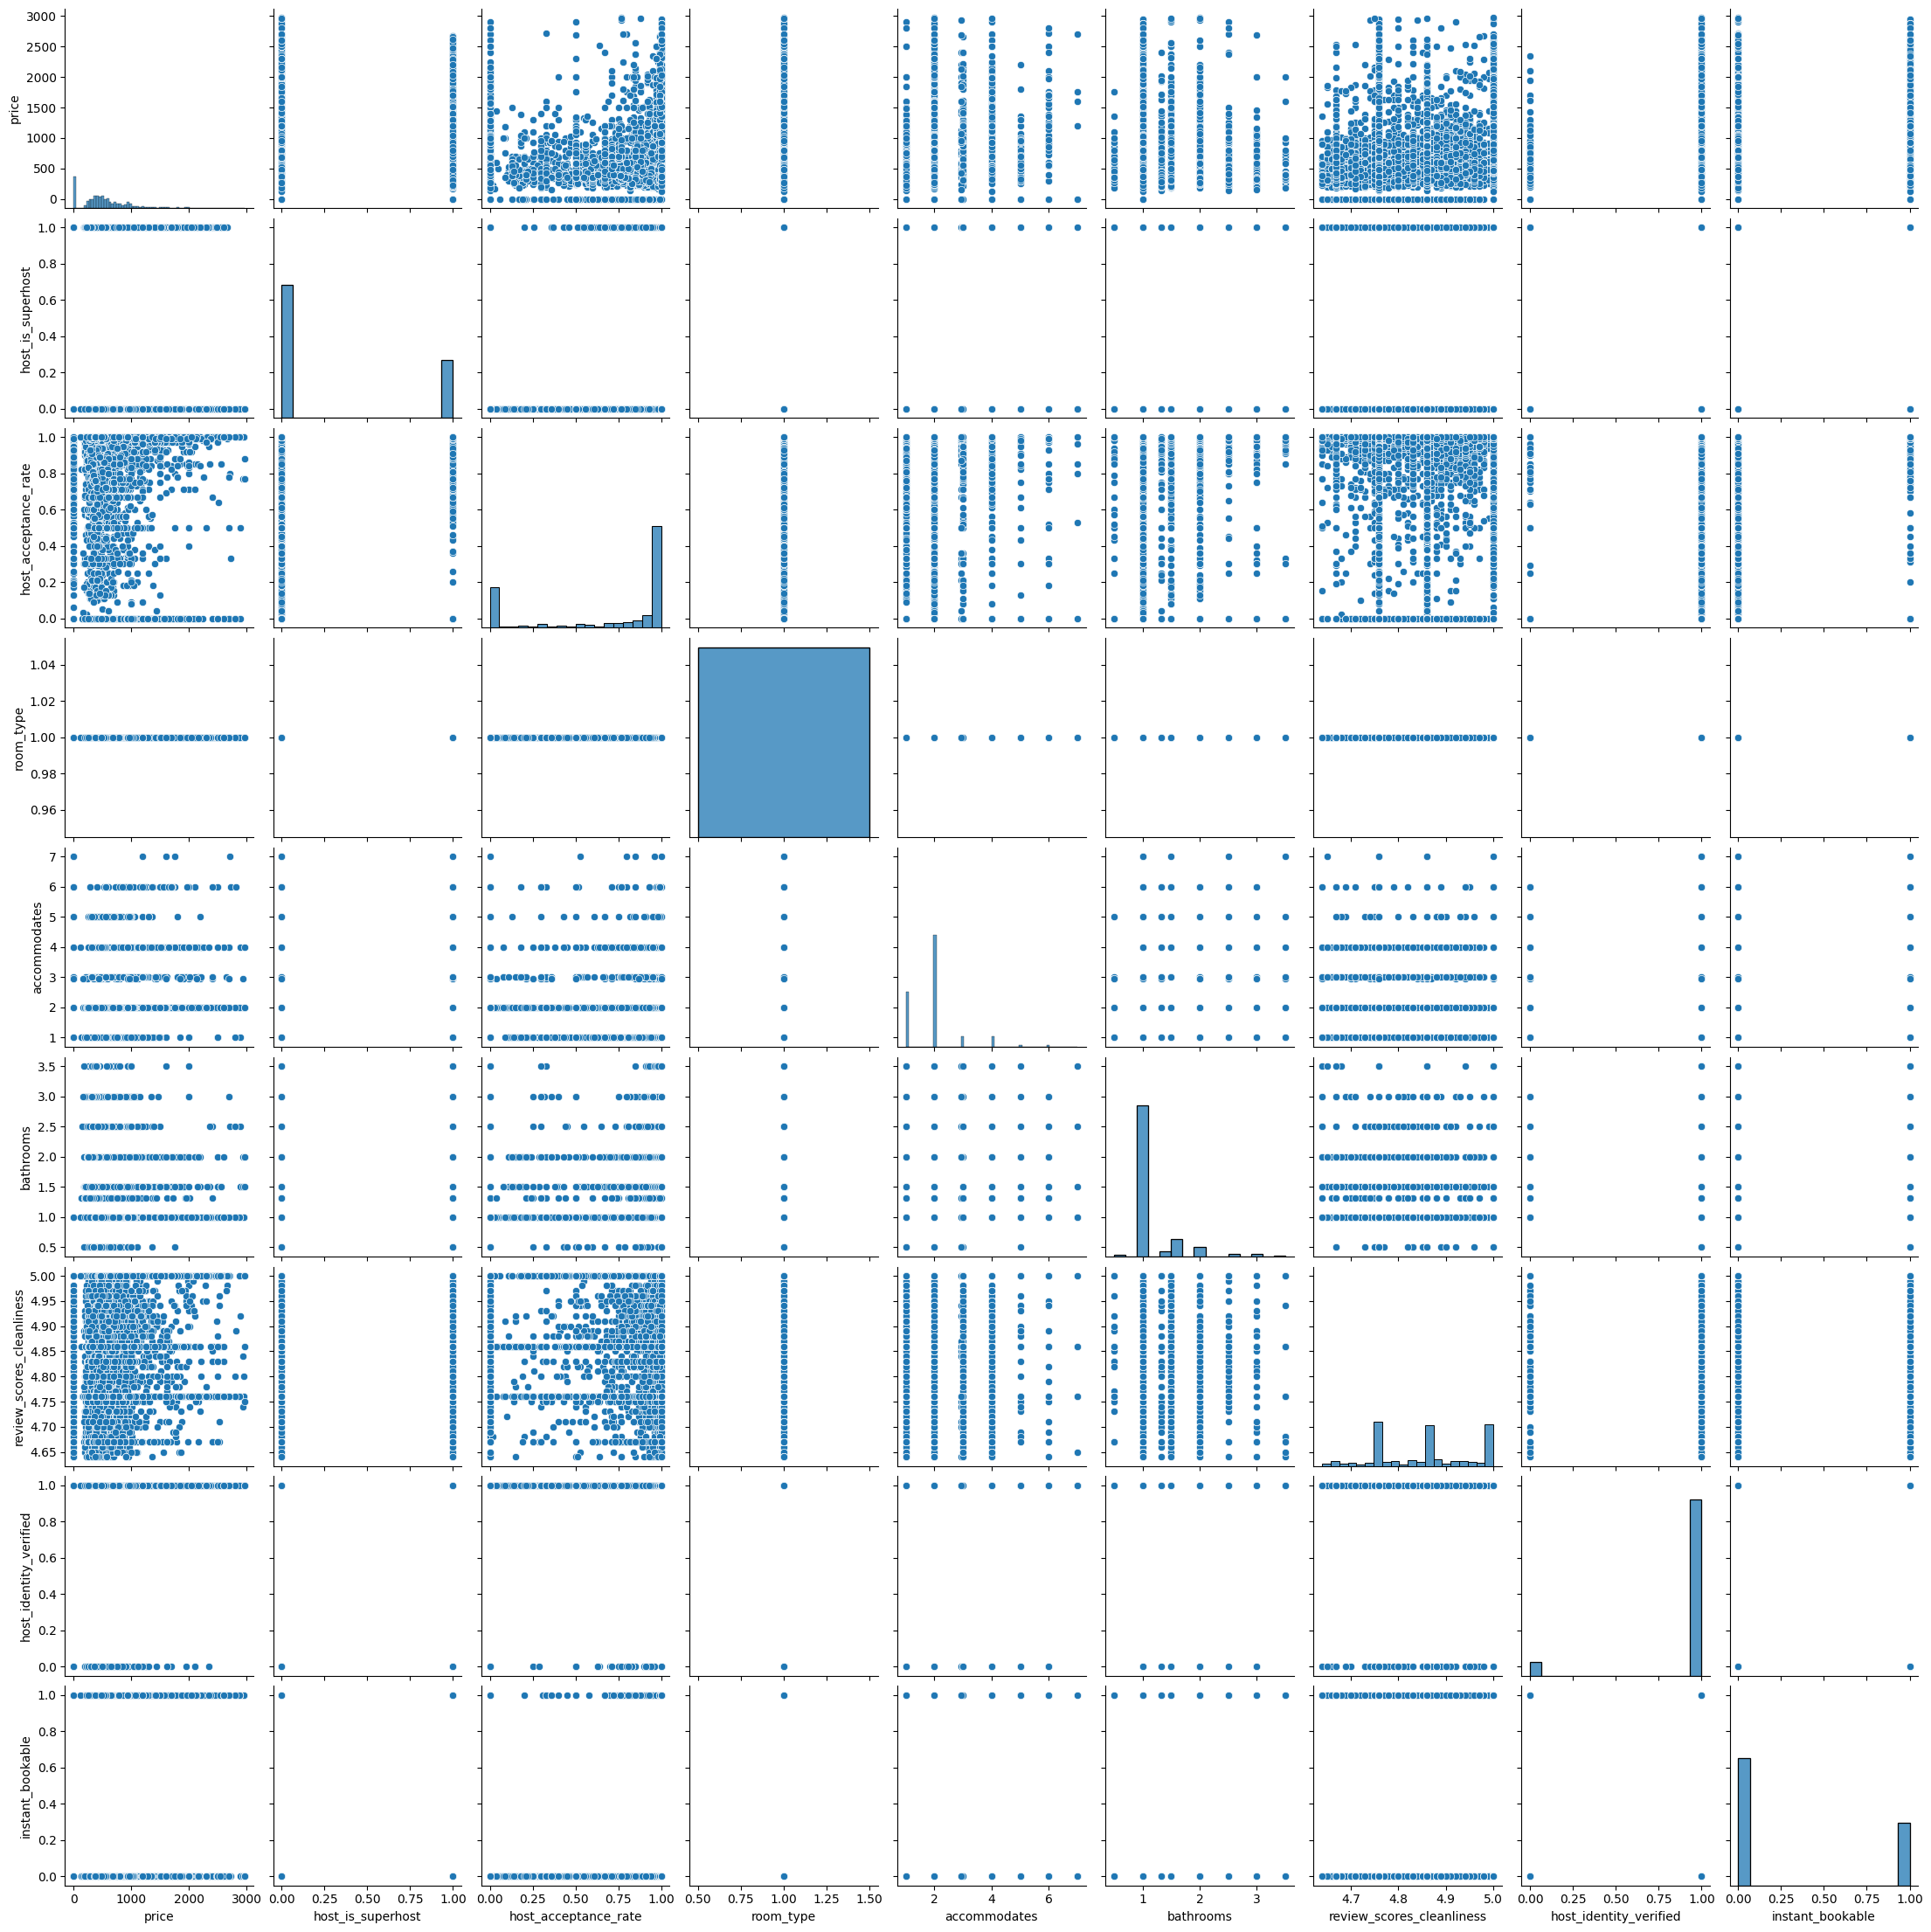

In [124]:
#Graficamos todas las disperciones
sns.pairplot(df)

In [125]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors = df.corr()
Corr_Factors

,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
price,1.000000,0.083595,0.200294,NaN,0.237094,0.057663,0.042566,0.269872,0.197584
host_is_superhost,0.083595,1.000000,0.397119,NaN,0.000999,0.005566,0.129708,0.165281,0.062411
host_acceptance_rate,0.200294,0.397119,1.000000,NaN,0.105924,0.044388,0.118066,0.390945,0.348277
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,0.237094,0.000999,0.105924,NaN,1.000000,0.073143,-0.015434,0.043593,0.134357
bathrooms,0.057663,0.005566,0.044388,NaN,0.073143,1.000000,-0.023302,0.075636,0.014236
review_scores_cleanliness,0.042566,0.129708,0.118066,NaN,-0.015434,-0.023302,1.000000,0.077223,-0.064730
host_identity_verified,0.269872,0.165281,0.390945,NaN,0.043593,0.075636,0.077223,1.000000,0.165735
instant_bookable,0.197584,0.062411,0.348277,NaN,0.134357,0.014236,-0.064730,0.165735,1.000000


In [126]:
#Encontramos el valor absoluto de las todas correlaciones
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
price,1.000000,0.083595,0.200294,NaN,0.237094,0.057663,0.042566,0.269872,0.197584
host_is_superhost,0.083595,1.000000,0.397119,NaN,0.000999,0.005566,0.129708,0.165281,0.062411
host_acceptance_rate,0.200294,0.397119,1.000000,NaN,0.105924,0.044388,0.118066,0.390945,0.348277
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,0.237094,0.000999,0.105924,NaN,1.000000,0.073143,0.015434,0.043593,0.134357
bathrooms,0.057663,0.005566,0.044388,NaN,0.073143,1.000000,0.023302,0.075636,0.014236
review_scores_cleanliness,0.042566,0.129708,0.118066,NaN,0.015434,0.023302,1.000000,0.077223,0.064730
host_identity_verified,0.269872,0.165281,0.390945,NaN,0.043593,0.075636,0.077223,1.000000,0.165735
instant_bookable,0.197584,0.062411,0.348277,NaN,0.134357,0.014236,0.064730,0.165735,1.000000


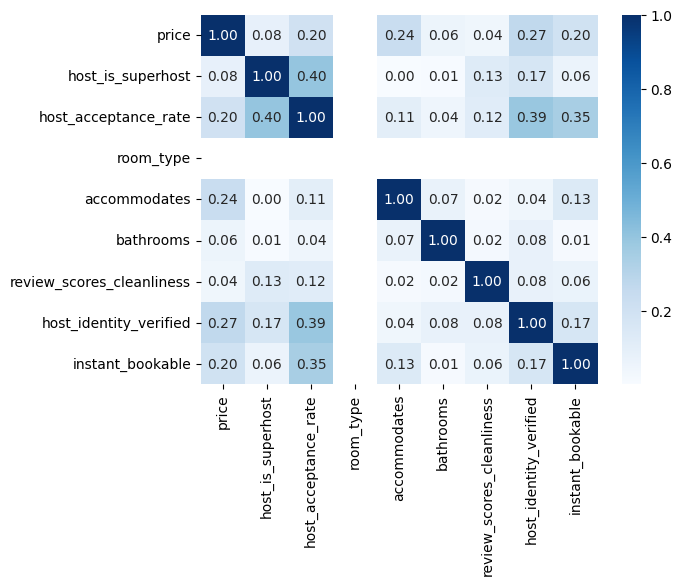

In [127]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap = 'Blues', annot=True, fmt=".2f")

Price Vs Host is Superhost

<Axes: xlabel='host_is_superhost', ylabel='price'>

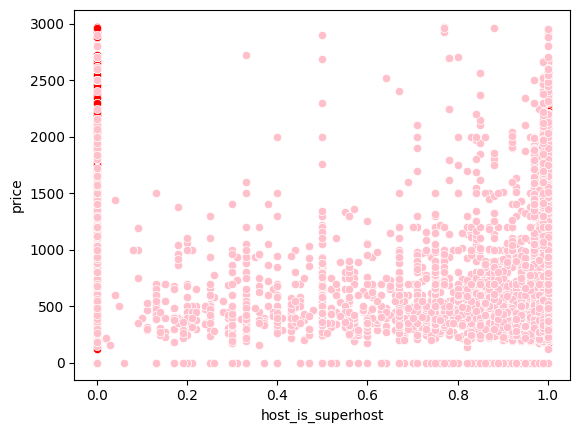

In [128]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "host_is_superhost"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_is_superhost',y='price',color='red',data=df)
sns.scatterplot(x='host_acceptance_rate',y='price',color='pink',data=df)

In [129]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_is_superhost']]
Var_Dep = df['price']

In [130]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [131]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([85.21271895]),
 'rank_': 1,
 'singular_': array([42.80117033]),
 'intercept_': np.float64(536.4035920250448)}

In [132]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.006988204856237301

In [133]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_is_superhost']])
y_predic

array([536.40359203, 621.61631098, 621.61631098, ..., 536.40359203,
       536.40359203, 536.40359203], shape=(8693,))

In [134]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones1', y_predic)
df

,Predicciones1,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
0,536.403592,0.0,0,0.00,1,2.0,1.0,4.76,0,0
1,621.616311,335.0,1,0.78,1,2.0,1.0,4.86,1,0
2,621.616311,384.0,1,1.00,1,1.0,1.5,4.92,1,0
3,536.403592,947.0,0,0.00,1,1.0,1.0,4.97,0,0
4,536.403592,1200.0,0,0.75,1,2.0,1.0,4.97,1,0
...,...,...,...,...,...,...,...,...,...,...
8688,536.403592,262.0,0,0.00,1,2.0,2.0,4.76,1,1
8689,621.616311,488.0,1,1.00,1,4.0,1.0,4.76,1,1
8690,536.403592,2800.0,0,1.00,1,2.0,1.0,4.76,1,1
8691,536.403592,2700.0,0,1.00,1,2.0,1.0,4.76,1,1


In [135]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.006988204856237301

In [136]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.08359548346793205)

<Axes: xlabel='host_is_superhost', ylabel='price'>

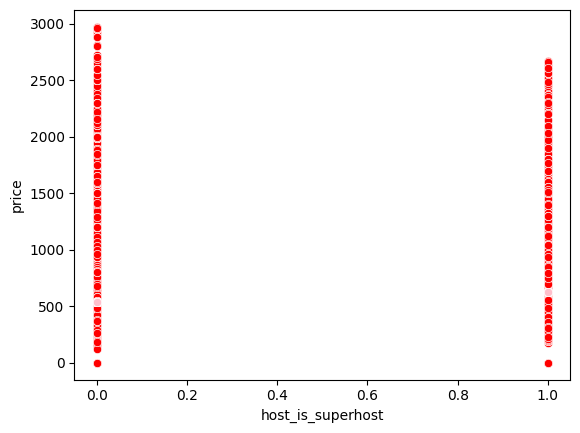

In [137]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='host_is_superhost',y='price',color='red',data = df)
sns.scatterplot(x='host_is_superhost',y='Predicciones1',color='pink',data = df)

Accomodates Vs Bathrooms

<Axes: xlabel='bathrooms', ylabel='price'>

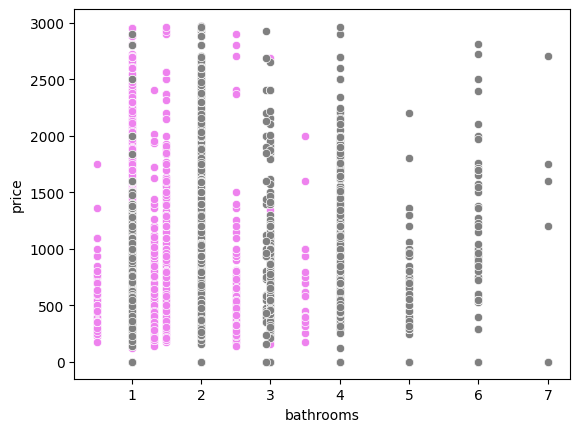

In [138]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "bathrooms"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='bathrooms',y='price',color='violet',data=df)
sns.scatterplot(x='accommodates',y='price',color='grey',data=df)

In [139]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['bathrooms']]
Var_Dep = df['price']

In [140]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [141]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([69.39584101]),
 'rank_': 1,
 'singular_': array([36.25275028]),
 'intercept_': np.float64(482.1019954890446)}

In [142]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.0033250202831632825

In [143]:
y_predic = model.predict(X = df[['bathrooms']])
y_predic

array([551.4978365 , 551.4978365 , 586.19575701, ..., 551.4978365 ,
       551.4978365 , 551.4978365 ], shape=(8693,))

In [144]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones2', y_predic)

<Axes: xlabel='bathrooms', ylabel='price'>

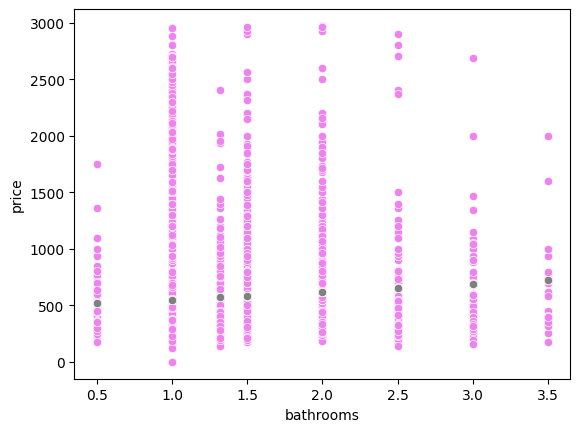

In [145]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='bathrooms',y='price',color='violet',data = df)
sns.scatterplot(x='bathrooms',y='Predicciones2',color='gray',data = df)

In [146]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.0033250202831632825

In [147]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.057662988850416715)

Review_scores_cleanliness vs price

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

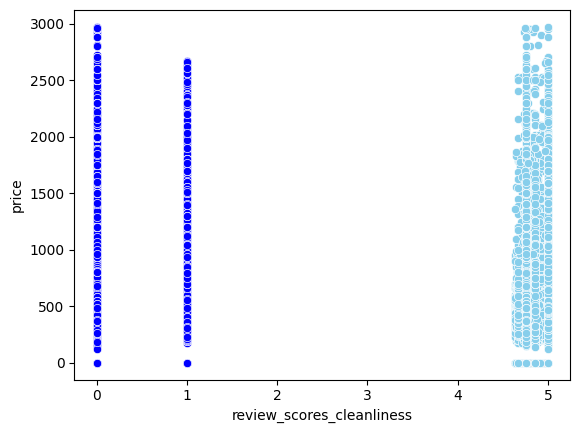

In [148]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "alcohol"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='review_scores_cleanliness',y='price',color='skyblue',data=df)
sns.scatterplot(x='host_is_superhost',y='price',color='blue',data=df)

In [149]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['review_scores_cleanliness']]
Var_Dep = df['price']

In [150]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [151]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([196.75245901]),
 'rank_': 1,
 'singular_': array([9.43887568]),
 'intercept_': np.float64(-393.4505183438647)}

In [152]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.0018118672000213554

In [153]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['review_scores_cleanliness']])
y_predic

array([543.09118653, 562.76643244, 574.57157998, ..., 543.09118653,
       543.09118653, 543.09118653], shape=(8693,))

In [154]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones3', y_predic)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

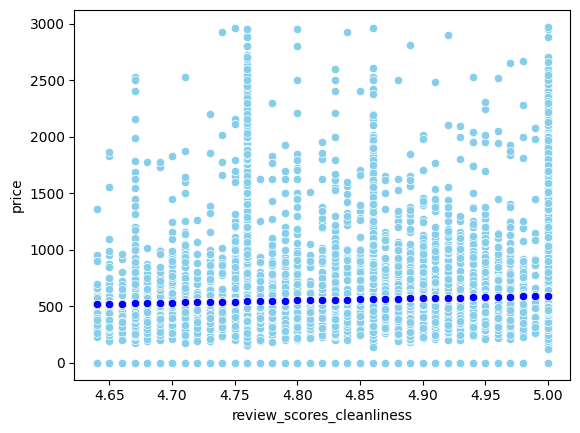

In [155]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='review_scores_cleanliness',y='price',color='skyblue',data = df)
sns.scatterplot(x='review_scores_cleanliness',y='Predicciones3',color='blue',data = df)

In [156]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.0018118672000213554

In [157]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.04256603340718225)

price vs host identity verified

<Axes: xlabel='host_identity_verified', ylabel='price'>

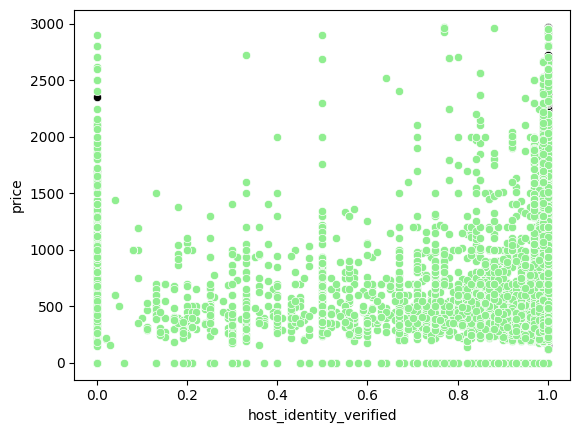

In [158]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "alcohol"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_identity_verified',y='price',color='black',data=df)
sns.scatterplot(x='host_acceptance_rate',y='price',color='lightgreen',data=df)

In [159]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_identity_verified']]
Var_Dep = df['price']

In [160]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [161]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([493.64190636]),
 'rank_': 1,
 'singular_': array([23.85192443]),
 'intercept_': np.float64(103.2364379084907)}

In [162]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.07283101863747832

In [163]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_identity_verified']])
y_predic

array([103.23643791, 596.87834426, 596.87834426, ..., 596.87834426,
       596.87834426, 596.87834426], shape=(8693,))

In [164]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones4', y_predic)
df

,Predicciones4,Predicciones3,Predicciones2,Predicciones1,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
0,103.236438,543.091187,551.497837,536.403592,0.0,0,0.00,1,2.0,1.0,4.76,0,0
1,596.878344,562.766432,551.497837,621.616311,335.0,1,0.78,1,2.0,1.0,4.86,1,0
2,596.878344,574.571580,586.195757,621.616311,384.0,1,1.00,1,1.0,1.5,4.92,1,0
3,103.236438,584.409203,551.497837,536.403592,947.0,0,0.00,1,1.0,1.0,4.97,0,0
4,596.878344,584.409203,551.497837,536.403592,1200.0,0,0.75,1,2.0,1.0,4.97,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,596.878344,543.091187,620.893678,536.403592,262.0,0,0.00,1,2.0,2.0,4.76,1,1
8689,596.878344,543.091187,551.497837,621.616311,488.0,1,1.00,1,4.0,1.0,4.76,1,1
8690,596.878344,543.091187,551.497837,536.403592,2800.0,0,1.00,1,2.0,1.0,4.76,1,1
8691,596.878344,543.091187,551.497837,536.403592,2700.0,0,1.00,1,2.0,1.0,4.76,1,1


<Axes: xlabel='host_identity_verified', ylabel='price'>

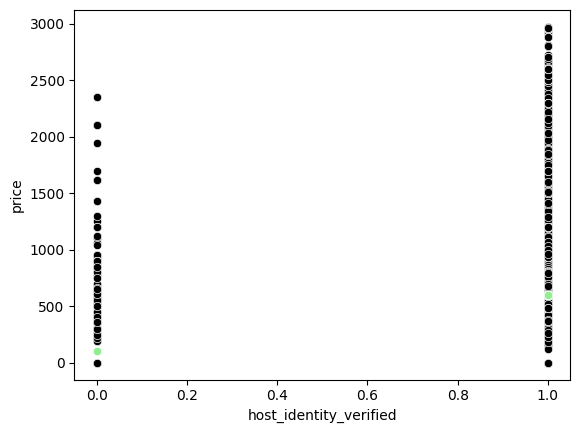

In [165]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='host_identity_verified',y='price',color='black',data = df)
sns.scatterplot(x='host_identity_verified',y='Predicciones4',color='lightgreen',data = df)

In [166]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.07283101863747832

In [167]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.2698722265026142)

price vs instant bookable

<Axes: xlabel='instant_bookable', ylabel='price'>

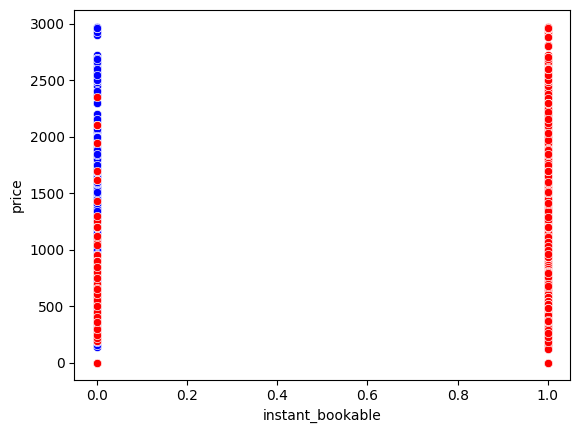

In [168]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "instant_bookable"
from turtle import color
sns.scatterplot(x='instant_bookable',y='price',color='blue',data=df)
sns.scatterplot(x='host_identity_verified',y='price',color='red',data=df)

In [169]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['instant_bookable']]
Var_Dep = df['price']

In [170]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [171]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([196.52095393]),
 'rank_': 1,
 'singular_': array([43.86528376]),
 'intercept_': np.float64(497.13066345823336)}

In [172]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.03903957730237162

In [173]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['instant_bookable']])
y_predic

array([497.13066346, 497.13066346, 497.13066346, ..., 693.65161739,
       693.65161739, 693.65161739], shape=(8693,))

In [174]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones5', y_predic)
df

,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones1,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
0,497.130663,103.236438,543.091187,551.497837,536.403592,0.0,0,0.00,1,2.0,1.0,4.76,0,0
1,497.130663,596.878344,562.766432,551.497837,621.616311,335.0,1,0.78,1,2.0,1.0,4.86,1,0
2,497.130663,596.878344,574.571580,586.195757,621.616311,384.0,1,1.00,1,1.0,1.5,4.92,1,0
3,497.130663,103.236438,584.409203,551.497837,536.403592,947.0,0,0.00,1,1.0,1.0,4.97,0,0
4,497.130663,596.878344,584.409203,551.497837,536.403592,1200.0,0,0.75,1,2.0,1.0,4.97,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,693.651617,596.878344,543.091187,620.893678,536.403592,262.0,0,0.00,1,2.0,2.0,4.76,1,1
8689,693.651617,596.878344,543.091187,551.497837,621.616311,488.0,1,1.00,1,4.0,1.0,4.76,1,1
8690,693.651617,596.878344,543.091187,551.497837,536.403592,2800.0,0,1.00,1,2.0,1.0,4.76,1,1
8691,693.651617,596.878344,543.091187,551.497837,536.403592,2700.0,0,1.00,1,2.0,1.0,4.76,1,1


<Axes: xlabel='instant_bookable', ylabel='price'>

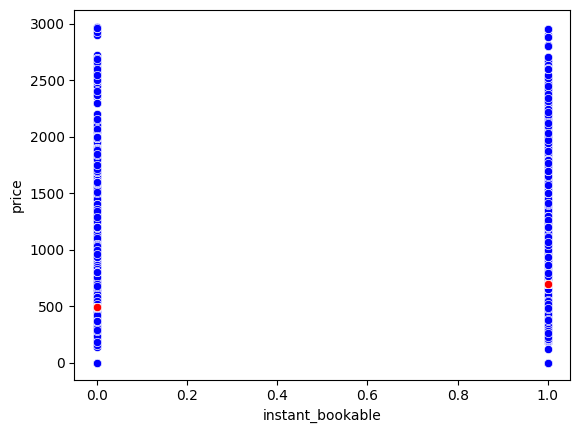

In [175]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='instant_bookable',y='price',color='blue',data = df)
sns.scatterplot(x='instant_bookable',y='Predicciones5',color='red',data = df)

In [176]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.03903957730237162

In [177]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.19758435490284046)

In [201]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.40551911805538393)